In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from bayes_opt import BayesianOptimization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 解决中文乱码问题
plt.rcParams["font.sans-serif"]=["SimHei"] 
plt.rcParams["axes.unicode_minus"]=False 

In [23]:
data=pd.read_csv('./try.csv')
train_data,test_data=train_test_split(data,test_size=0.2, random_state=1318)
feature=train_data.drop(['Ea','Unnamed: 0'],axis=1)
label=train_data['Ea']
x_test=test_data.drop(['Ea','Unnamed: 0'],axis=1)
y_test=test_data['Ea']

In [24]:
kfold = KFold(n_splits = 5, random_state = 1314, shuffle = True)

In [25]:
def RFR_cv(n_estimators, min_samples_split, max_depth):
    val = cross_val_score(
        RandomForestRegressor(n_estimators=int(n_estimators),
            min_samples_split=int(min_samples_split),
            max_depth=int(max_depth),
            random_state=1314
        ),
        feature, label, scoring='r2', cv=kfold
    ).mean()
    return val

In [26]:
RFR_opt = BayesianOptimization(
        RFR_cv,
        {'n_estimators': (50, 1000),
        'min_samples_split': (2, 25),
        'max_depth': (2, 15)}
    )

In [27]:
RFR_opt.maximize(n_iter=50)

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------
| 1         | 0.6641    | 9.402     | 11.96     | 617.6     |
| 2         | 0.6168    | 12.66     | 16.56     | 723.0     |
| 3         | 0.5789    | 3.163     | 18.6      | 528.3     |
| 4         | 0.5741    | 5.74      | 21.84     | 866.7     |
| 5         | 0.5684    | 3.565     | 20.95     | 363.9     |
| 6         | 0.6424    | 9.146     | 14.68     | 616.0     |
| 7         | 0.6682    | 6.422     | 9.826     | 623.1     |
| 8         | 0.6911    | 14.6      | 2.0       | 620.6     |
| 9         | 0.6463    | 3.996     | 2.0       | 611.2     |
| 10        | 0.6913    | 15.0      | 2.0       | 636.7     |
| 11        | 0.6433    | 15.0      | 14.5      | 650.5     |
| 12        | 0.6466    | 3.749     | 2.05      | 646.7     |
| 13        | 0.649     | 9.468     | 14.33     | 96.17     |
| 14        | 0.6598    | 14.9      | 12.58     | 628.8     |
| 15    

In [28]:
model = RandomForestRegressor(n_estimators=1000,
                              max_depth=25,
                              max_features=45,
                              random_state=1314).fit(X=feature , y=label)
r2_score = cross_val_score(model, feature, label, cv=kfold, scoring='r2').mean()
rmse_score = pow(abs(cross_val_score(model, feature, label, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5)
print('r2:',r2_score)
print('rmse:',rmse_score)

r2: 0.6892221709497571
rmse: 0.1973976361922265


In [29]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print('r2:',r2_score(label,model.predict(feature)))
print('MAE:',mean_absolute_error(label,model.predict(feature)))
print('测试集得分为：', r2_score(y_test,model.predict(x_test)),mean_absolute_error(y_test,model.predict(x_test)))

r2: 0.9545674543453007
MAE: 0.053887714625850104
测试集得分为： 0.7491712339399642 0.13270851292516905


In [30]:
# 预测1
Y1=model.predict(test_data.drop(['Ea','Unnamed: 0'],axis=1))
Y2=test_data['Ea']
d={'Y_pred':Y1,
   'Y_True':Y2
   }
pred_show=pd.DataFrame(d)

In [31]:
# 预测2
Y_1=model.predict(X=feature)
Y_2=label
d_1={'Y_pred':Y_1,
   'Y_True':Y_2
   }
pred_show_1=pd.DataFrame(d_1)

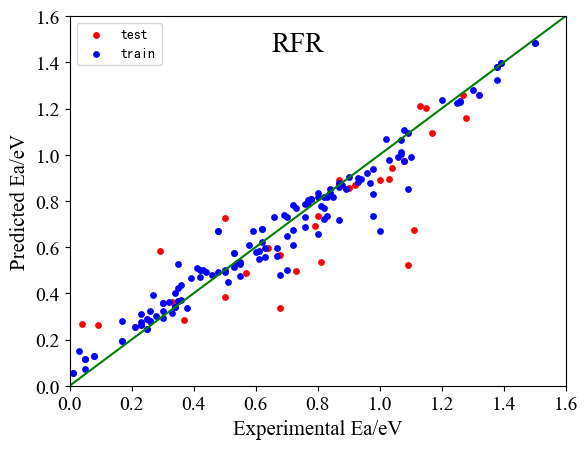

In [32]:
plt.scatter(pred_show.iloc[:,1],pred_show.iloc[:,0],color='r',s=15,label='test')
plt.scatter(pred_show_1.iloc[:,1],pred_show_1.iloc[:,0],color='b',s=15,label='train')
plt.xlim((0,1.6))
plt.xlabel('Experimental Ea/eV',fontsize=15,font=Path('..\TimesNewRoman.ttf'))
plt.xticks(fontsize=14,fontname='Times New Roman')
plt.ylim((0,1.6))
plt.ylabel('Predicted Ea/eV',fontsize=15,font=Path('..\TimesNewRoman.ttf'))
plt.yticks(fontsize=14,fontname='Times New Roman')
plt.plot([0,1.6],[0,1.6],color='g')
plt.text(0.65,1.45,'RFR',fontsize=20,font=Path('..\TimesNewRoman.ttf'))
plt.legend()
plt.show()